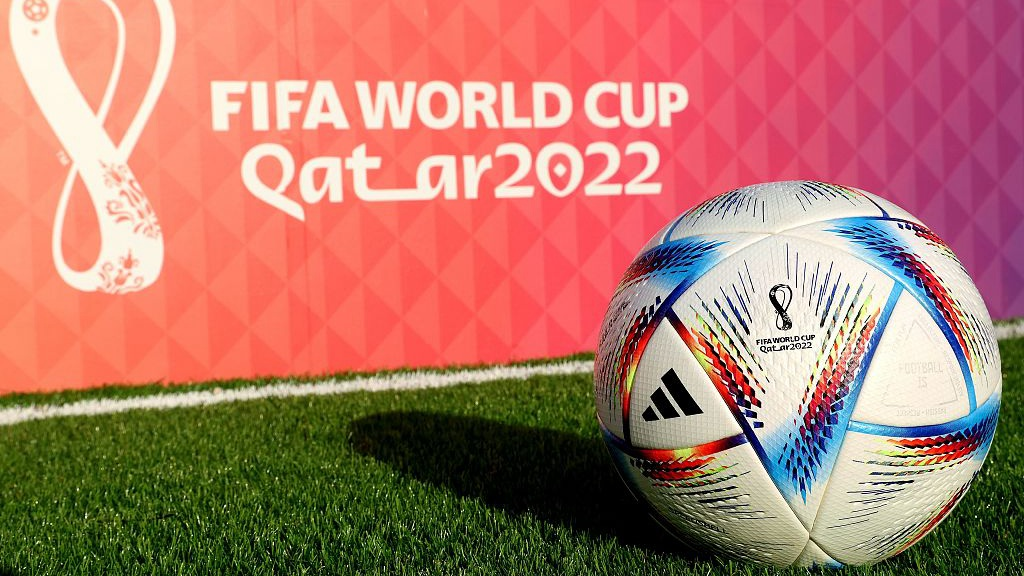

**What better way to predict which team will win the 2022 World Cup then by exploring their performance in previous international matches!** 

There are many questions we can trie to answer with the dataset. For example, what team has the strongest offense and defense players? Is there such a thing as a home team advantage? And is there a correlation between the strength of a team and their game result? Let's find out!

If you are feeling very adventurous, can you create new features and built a machine learning model to predict this year's winner?

# 1 Housekeeping

## 1.1 Load libraries

In [1]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import datetime as dt
from matplotlib.ticker import MaxNLocator
  
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)

#custom palette
colors = ["#66C8D5","#00478E", "#E1EAA7",  "#84A266", "#F25C5C", ]
sns.set_palette(sns.color_palette(colors))

## 1.2 Load data

In [2]:
df = pd.read_csv('/kaggle/input/fifa-world-cup-2022/international_matches.csv', parse_dates = ['date'])
df.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
25728,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,1,UEFA Nations League,Chișinău,Moldova,False,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25729,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,2,UEFA Nations League,Vaduz,Liechtenstein,False,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
25730,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,0,Kirin Cup,Suita,Japan,True,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
25731,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,3,Kirin Cup,Suita,Japan,False,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
25732,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,1,Friendly,Seoul,Korea Republic,False,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


# 2 EDA

## 2.1 What are the 5 strongest teams?

FIFA updates the ranking of teams multiple times a year based on the team's performance in matches. Each team is awarded a certain number of points based on wheteher the won or drawn, the importance of the match and the strength of the opposing team. The overall number of points determines the FIFA rank of the team. 

If we want to know the most recent rank of the team, we must focus on the most recent game each team played...

In [3]:
#let's re-shape the data a bit
fifa_rank = df[['date', 'home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank']]
home = fifa_rank[['date', 'home_team','home_team_fifa_rank']].rename(columns = {'home_team': 'team', 'home_team_fifa_rank' : 'rank'})
away = fifa_rank[['date', 'away_team','away_team_fifa_rank']].rename(columns = {'away_team': 'team', 'away_team_fifa_rank' : 'rank'})
fifa_rank = home.append(away)

#select for each country the latest match
fifa_rank  = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])
fifa_rank['row_number'] = fifa_rank.groupby('team').cumcount()+1
fifa_rank_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nsmallest(5, 'rank')

#let's see the 5 strongest teams
fifa_rank_top

,date,team,rank
25572,2022-06-06,Brazil,1
25721,2022-06-14,Belgium,2
25697,2022-06-13,France,3
25553,2022-06-05,Argentina,4
25718,2022-06-14,England,5


Brazil currently holds the highest FIFA rank, followed by Belgium, France, Argentina and England. 1 Point for Brazil!


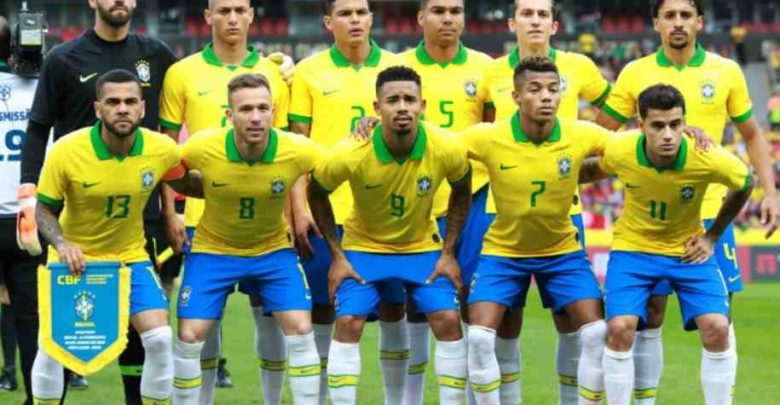

## 2.2 What team has the strongest offense?

It is often said that the most important position in soccer is the striker. Without the striker, the team would score fewer goals which reduces the chances of the team winning the match. What team has the strongest offense?

In [4]:
#let's re-shape the data a bit
offense = df[['date', 'home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score']]
home = offense [['date', 'home_team','home_team_mean_offense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_offense_score' : 'offense_score'})
away = offense [['date', 'away_team','away_team_mean_offense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_offense_score' : 'offense_score'})
offense  = home.append(away)

#select for each country the latest match
offense   = offense .sort_values(['team', 'date'], ascending=[True, False])
offense ['row_number'] = offense .groupby('team').cumcount()+1
offense_top = offense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(20, 'offense_score')


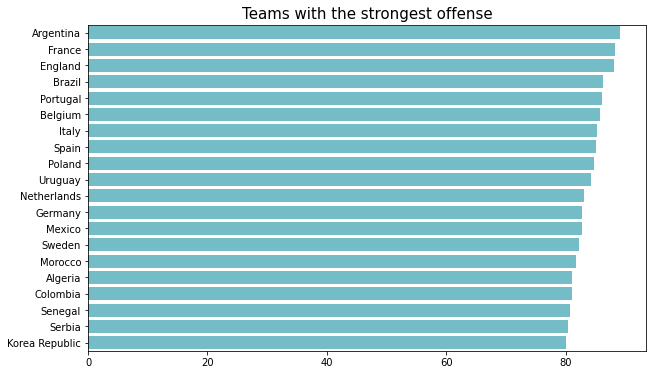

In [5]:
#plot the teams with the strongest offense players
fig, axes = plt.subplots(1,1,  figsize=(10, 6))
ax = sns.barplot(data = offense_top, y = 'team', x = 'offense_score', orientation = 'horizontal', color = "#66C8D5")
ax.set_title ('Teams with the strongest offense', fontsize = 15)
ax.set(xlabel = '', ylabel = '')

plt.show()

Wow, so close! The offense score is the average FIFA game score of the three strongest offense players within a team. Argentina, France and England take the lead, closely followed by a bunch of other countries. One point for Argentina!

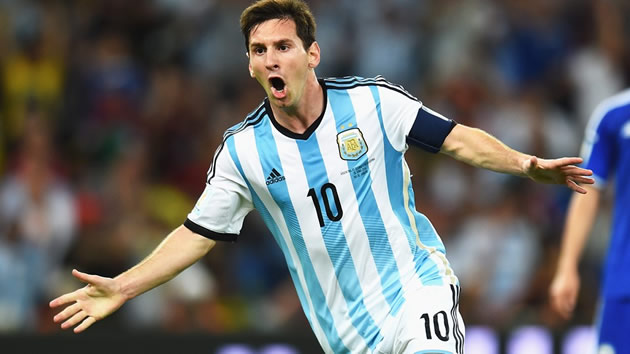

## 2.3 Who is most likely to win the opening match?

On sunday 20 November Qatar and Ecuador kick off the 2022 World Cup. Which team is most likely to win?

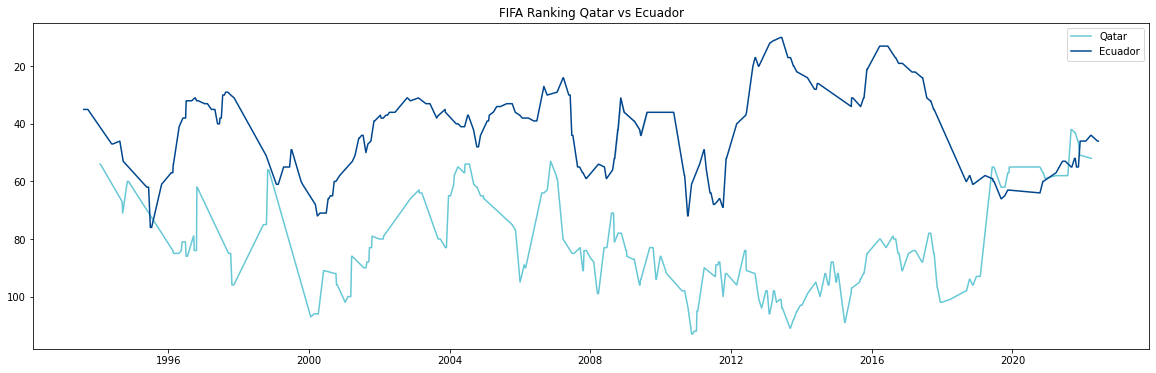

In [6]:
fig, axes = plt.subplots(1,1,  figsize=(20, 6))
qat = fifa_rank[fifa_rank['team']=='Qatar']
ecu = fifa_rank[fifa_rank['team']=='Ecuador']
ax = sns.lineplot(data = qat, x = 'date', y = 'rank', label = 'Qatar', color = "#66C8D5")
ax = sns.lineplot(data = ecu, x = 'date', y = 'rank', label = 'Ecuador', color = '#00478E' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA Ranking Qatar vs Ecuador')
plt.show()

Interessting! Historically, Ecuador performed quite a bit better than Qatar. In more recent years Ecuador appears to be struggling, whereas the quality of Qatar has clearly improved. Ecuador is still slightly superior over Qatar, but Qatar will be playing a home game... Is there such a thing as a home team advantage?

## 2.4 Is there such a thing as a home team advantage?

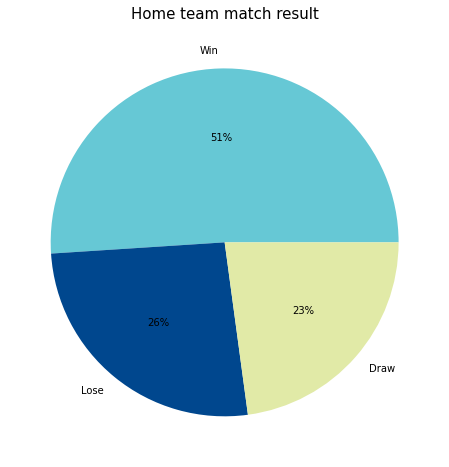

In [7]:
#select all matches played at non-neutral locations
home_team_advantage = df[df['neutral_location']==False]['home_team_result'].value_counts(normalize=True)

#plot
fig, axes = plt.subplots(1,1,  figsize=(8,8))
ax =plt.pie(home_team_advantage  ,labels = ['Win',  'Lose', 'Draw'],  autopct='%.0f%%')
plt.title('Home team match result', fontsize = 15)
plt.show()

A team that plays in their own country clearly has a much larger chance of winning the game. Despite Ecuador being slightly stronger than Qatar, the odds of Qatar wining are better because of their home team advantage.

## 2.5 how well does the strength of both teams correlate with the result of the match?

In [8]:
#lets create some new features 

#numerical column for match result
df['match_result'] = np.where(df['home_team_result']=='Win', 2, 
                         np.where(df['home_team_result']=='Draw', 1, 0))

#fifa rank delta of home and away team (higher values indicate that home team is stronger than away team)
df['fifa_rank_delta'] = df['away_team_fifa_rank'] - df ['home_team_fifa_rank']

#offense home team vs defense away team (higher values indicate that home team offense is stronger than away team defense)
df['offense/defense_ratio'] = df['home_team_mean_offense_score'] / df['away_team_mean_defense_score']


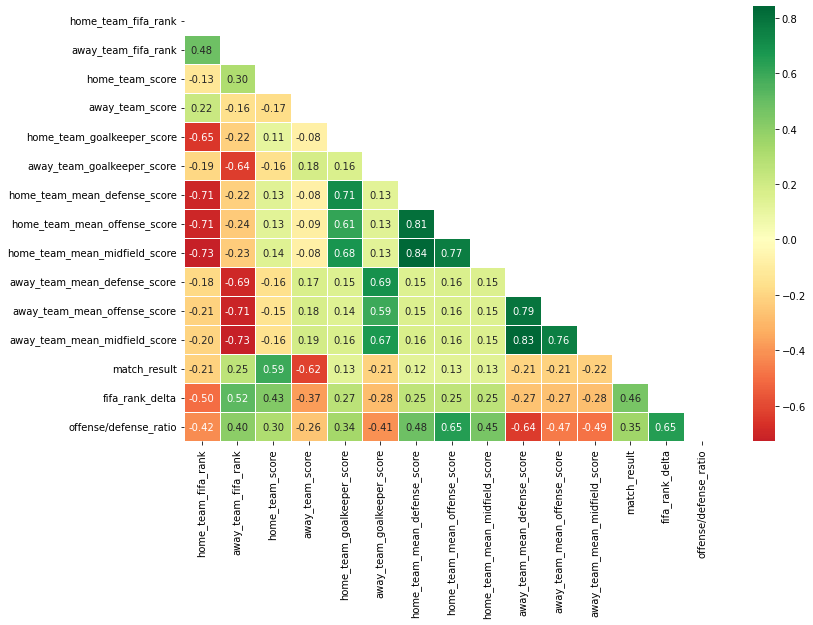

In [9]:
# Create the correlation matrix
corr_mean = df.drop(['home_team_total_fifa_points', 'away_team_total_fifa_points', 'neutral_location'],axis=1).corr(method = 'pearson')

#create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mean, dtype=bool))

# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(12,8)) 
ax = sns.heatmap(corr_mean, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True, fmt=".2f")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#ax.set_yticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

We can clearly find some nice correlations here. Of course, the more the home team score and the less the away team scores, the better the chances are for the home team to win the match.

The FIFA rank is also of great importance in determining the match result. The stronger team tends to win the game, but this clearly doesn't happen all the time. Why do you think this is???

# 3 Next steps

There are many more nice inisghts to find in the dataset.
* Can you explain why the stronger team does not always win?
* What team has the longest winning streak?
* Can you create a machine learning model that predicts the winner of the 2022 World Cup?

Enjoy!

!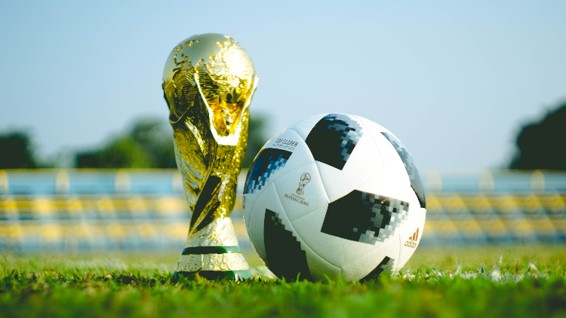